# Many to one relationships

- 개요

- 댓글 모델 구현

- 관계 모델 참조

- 댓글 구현

### Many to one relationships(N:1 / 1:N)

: 한 테이블의 0개 이상의 레코드가 다른 테이블의 레코드 한 개와 관련된 관계

```
- Comment - Article : 0 개 이상의 댓글은 1 개의 게시글에 작성될 수 있다.

- Comment(N) - Article(1)

- ForeignKey() : N:1 관계 설정 모델 필드
```

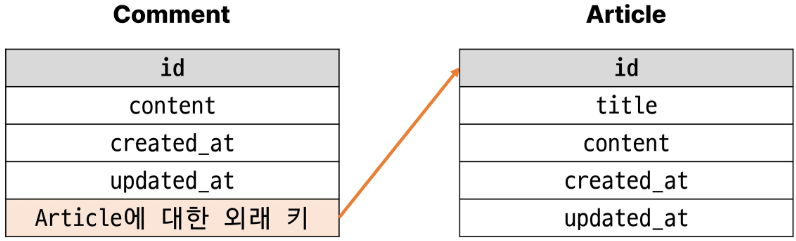

<br>

## 댓글 모델 구현

### 댓글 모델 정의 

ex)

`article = models.ForeignKey(Article, on_delete=models.CASCADE)`

- ForeignKey() 클래스의 인스턴스 이름을 참조하는 모델 클래스 이름의 **단수형**으로 작성하는 것을 권장

- ForeignKey 클래스를 작성하는 위치와 관계없이 외래 키는 테이블 필드 마지막에 생성됨

`ForeignKey(to, on_delete)`

- to : 참조하는 모델 class 이름

- on_delete : 외래 키가 참조하는 객체(1)가 사라졌을 때, 외래 키를 가진 객체(N)을 어떻게 처리할 지를 정의하는 설정(데이터 무결성)

    - `on_delete=CASCADE`   : 부모 객체(참조 된 객체)가 삭제 됐을 때 이를 참조하는 객체도 삭제


### 댓글 생성

0. Comment 클래스의 인스턴스 comment 생성

    ex) `comment = Comment()`

1. 게시글 조회

    ex) `article = Article.objects.get(pk=1)`

2. **외래 키 데이터 입력** : 댓글을 작성해 줄 외래 키 클래스를 지정해주어야 한다.

    ex) `comment.article = article`

3. 댓글 저장 및 확인

    ex) `comment.save()`

<br>

## 관계 모델 참조

### 역참조

: N:1 관계에서 1에서 N을 참조하거나 조회하는 것 1-> N

-> <U>N은 외래 키를 가지고 있어 물리적으로 참조가 가능하지만 1은 N에 대한 참조 방법이 존재하지 않아 별도의 역참조 이름이 필요</U>

ex) article.**comment_set**.all()

    모델 인스턴스.related manager(역참조 이름).QuerySet API

### related manager

: N:12 혹은 M:N 관계에서 역참조 시에 사용하는 매니저

-> 'objests' 매니저를 통해 queryset api를 사용했던 것처럼 related manager를 통해 queryset api를 사용할 수 있게 됨

#### related manager 이름 규칙

- N:1 관계에서 생성되는 Related manager의 이름은 참조하는 "모델명_set" 이름 규칙으로 만들어짐

- 해당 댓글의 게시글 (Comment -> Article)

- 게시글의 댓글 목록 (Article -> Comment)

<br>

## 댓글 작성 구현

1. 사용자로부터 댓글 데이터를 입력 받기 위한 CommentForm 정의

2. detail view 함수에서 CommentForm을 사용하여 detail 페이지에 렌더링

! 문제가 발생

- Comment 클래스의 외래 키 필드 article 또한 데이터 입력이 필요한 필드이기 때문에 출력되고 있는 것. 

- 하지만, 외래 키 필드는 <U>사용자 입력 값으로 받는 것이 아닌 view 함수 내에서 다른 방법으로 전달 받아 저장</U>되어야 함

3. CommentForm의 출력 필드 조정

4. url 작성 및 detail.html의 action 값 작성

5. comments_create view 함수 정의

6. save의 commit 인자를 활용해 외래 키 데이터 추가 입력

    `save(commit=False)` : DB에 저장하지 않고 인스턴스만 반환

## 댓글 READ 구현

1. detail view 함수에서 전체 댓글 데이터를 조회

2. 전체 댓글 출력 및 확인

## 댓글 DELETE

1. 댓글 삭제 url 작성

U